In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
#!wget $data_url -O data_week_3.csv

In [207]:
df = pd.read_csv('data_week_3.csv')

In [208]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [209]:
df.head().T # rows become columns

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [210]:
# data not uniformed, not consistante

In [211]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [212]:
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [213]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [214]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [215]:
df.dtypes # totalcharges should be a number, but it's object(so string)

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [216]:
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [217]:
# try to convert to number
pd.to_numeric(df.totalcharges) # takes data series

ValueError: Unable to parse string "_" at position 488

In [218]:
df.totalcharges[488]

'_'

In [219]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [220]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [221]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [222]:
df[df.totalcharges.isnull()].totalcharges + 1

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: totalcharges, dtype: float64

In [223]:
df.totalcharges = df.totalcharges.fillna(0)

In [224]:
df.totalcharges.isnull().sum()

0

In [225]:
df.churn # we want change yes -> 1 no -> 0

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [226]:
df.churn = (df.churn == 'yes').astype('int')

In [227]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
train_test_split?

In [230]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [231]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [232]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [233]:
df_train.shape[0] + df_val.shape[0] + df_test.shape[0] == df.shape[0]

True

In [234]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [235]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [236]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [37]:
df_full_train = df_full_train.reset_index(drop=True)

In [38]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [43]:
df_full_train.churn.value_counts(normalize=True) #normalize = True show in %
# 27% -is CHURN RATE

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [44]:
df_full_train.churn.mean()

0.26996805111821087

In [40]:
df_full_train.churn.describe()

count    5634.000000
mean        0.269968
std         0.443982
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

In [45]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [46]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [48]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [52]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [53]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [55]:
female_churn_rate = df_full_train[df_full_train.gender == 'female'].churn.mean()
male_churn_rate = df_full_train[df_full_train.gender == 'male'].churn.mean()

In [57]:
(female_churn_rate - male_churn_rate)/male_churn_rate

0.05170898185014739

In [59]:
partner_yes_churn_rate = df_full_train[df_full_train.partner == 'yes'].churn.mean()
partner_no_churn_rate = df_full_train[df_full_train.partner == 'no'].churn.mean()

In [60]:
partner_yes_churn_rate, partner_no_churn_rate

(0.20503330866025166, 0.3298090040927694)

In [61]:
(partner_no_churn_rate - partner_yes_churn_rate)/partner_yes_churn_rate

0.608563048842352

In [62]:
global_churn = df_full_train.churn.mean()

# Risk ration

In [64]:
partner_yes_churn_rate/global_churn, partner_no_churn_rate/global_churn

(0.7594724924338315, 1.2216593879412643)

In [65]:
# risk = group/global
# people with partner are low risk group
# people without partner are high risk group risk of group are higher than for all group

In [67]:
df.groupby('gender').churn.mean()

gender
female    0.269209
male      0.261603
Name: churn, dtype: float64

In [68]:
df.groupby('partner').churn.mean()

partner
no     0.329580
yes    0.196649
Name: churn, dtype: float64

In [79]:
from IPython.display import display

In [80]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean']/global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [76]:
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


# Mutual info

In [81]:
from sklearn.metrics import mutual_info_score

In [87]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [95]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# Correlation

In [108]:
# way to measure dependecy between variables
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [109]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [110]:
df_full_train[df_full_train.tenure > 2].churn.mean()

0.22478269658378816

In [111]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [112]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

In [113]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [114]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [115]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

In [117]:
df_full_train[numerical].corrwith(df_full_train.churn).abs() # show importance of numerical values

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

# One-hot encoding

In [118]:
#categorical columns -> set of binary numerical columns

In [119]:
from sklearn.feature_extraction import DictVectorizer

In [136]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient = 'records')

In [137]:
dv = DictVectorizer(sparse = False)

In [138]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [141]:
dv.get_feature_names() # first three - contract, 4-5 it's gender # tenure don't do one-hot transform

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male',
 'tenure']

In [140]:
dv.transform(dicts) # sparse matrix mean that a lot of values are zeros

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

In [142]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [144]:
dv = DictVectorizer(sparse=False)

In [147]:
X_train = dv.fit_transform(train_dict)

In [148]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [153]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [154]:
X_val = dv.transform(val_dicts)

# Logistic Regression

- classification

In [155]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [160]:
z = np.linspace(-7, 7, 71)

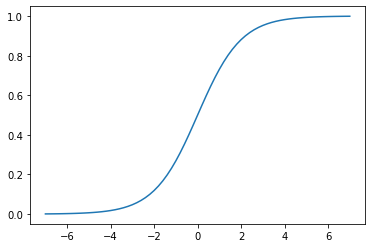

In [161]:
plt.plot(z, sigmoid(z))

In [162]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j]*w[j]

    return result

In [164]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score + xi[j]*w[j]
    
    result = sigmoid(score)
    return result

# Training logistic regression with Scikit-Learn

- Train a model with Scikit-Learn
- Apply to val set
- calculate accuracy

In [166]:
from sklearn.linear_model import LogisticRegression

In [280]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/artemnikolaev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [195]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [196]:
model.intercept_[0].round(3)

-0.109

In [197]:
model.predict(X_train) # hard predictions

array([0, 1, 1, ..., 1, 0, 1])

In [198]:
model.predict_proba(X_val) # it's score, 1 column, probability being negative , probability being negative class

array([[0.991001  , 0.008999  ],
       [0.79534939, 0.20465061],
       [0.78764484, 0.21235516],
       ...,
       [0.86360216, 0.13639784],
       [0.20027492, 0.79972508],
       [0.16262965, 0.83737035]])

In [199]:
y_pred = model.predict_proba(X_val)[:, 1]

In [256]:
churn_decision = (y_pred >= 0.5)

In [255]:
(churn_decision.astype(int) == y_val).mean()

0.8034066713981547

# Model interpretation

In [261]:
dv_features = np.array(dv.feature_names_)

In [262]:
model_coef = model.coef_[0].round(3)

In [264]:
np.vstack([dv_features, model_coef]).T

array([['contract=month-to-month', '0.475'],
       ['contract=one_year', '-0.175'],
       ['contract=two_year', '-0.408'],
       ['dependents=no', '-0.03'],
       ['dependents=yes', '-0.078'],
       ['deviceprotection=no', '0.063'],
       ['deviceprotection=no_internet_service', '-0.089'],
       ['deviceprotection=yes', '-0.081'],
       ['gender=female', '-0.034'],
       ['gender=male', '-0.073'],
       ['internetservice=dsl', '-0.335'],
       ['internetservice=fiber_optic', '0.317'],
       ['internetservice=no', '-0.089'],
       ['monthlycharges', '0.004'],
       ['multiplelines=no', '-0.258'],
       ['multiplelines=no_phone_service', '0.141'],
       ['multiplelines=yes', '0.009'],
       ['onlinebackup=no', '0.063'],
       ['onlinebackup=no_internet_service', '-0.089'],
       ['onlinebackup=yes', '-0.081'],
       ['onlinesecurity=no', '0.266'],
       ['onlinesecurity=no_internet_service', '-0.089'],
       ['onlinesecurity=yes', '-0.284'],
       ['paperlessbillin

In [266]:
list(zip(dv.feature_names_, model.coef_[0].round(3)))

[('contract=month-to-month', 0.475),
 ('contract=one_year', -0.175),
 ('contract=two_year', -0.408),
 ('dependents=no', -0.03),
 ('dependents=yes', -0.078),
 ('deviceprotection=no', 0.063),
 ('deviceprotection=no_internet_service', -0.089),
 ('deviceprotection=yes', -0.081),
 ('gender=female', -0.034),
 ('gender=male', -0.073),
 ('internetservice=dsl', -0.335),
 ('internetservice=fiber_optic', 0.317),
 ('internetservice=no', -0.089),
 ('monthlycharges', 0.004),
 ('multiplelines=no', -0.258),
 ('multiplelines=no_phone_service', 0.141),
 ('multiplelines=yes', 0.009),
 ('onlinebackup=no', 0.063),
 ('onlinebackup=no_internet_service', -0.089),
 ('onlinebackup=yes', -0.081),
 ('onlinesecurity=no', 0.266),
 ('onlinesecurity=no_internet_service', -0.089),
 ('onlinesecurity=yes', -0.284),
 ('paperlessbilling=no', -0.231),
 ('paperlessbilling=yes', 0.124),
 ('partner=no', -0.166),
 ('partner=yes', 0.058),
 ('paymentmethod=bank_transfer_(automatic)', -0.087),
 ('paymentmethod=credit_card_(automa

In [269]:
small = ['contract', 'tenure', 'monthlycharges']

In [271]:
df_train[small].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 99.9},
 {'contract': 'month-to-month', 'tenure': 17, 'monthlycharges': 102.55},
 {'contract': 'two_year', 'tenure': 66, 'monthlycharges': 58.2},
 {'contract': 'month-to-month', 'tenure': 2, 'monthlycharges': 68.95},
 {'contract': 'month-to-month', 't

In [272]:
dicts_train_small = df_train[small].to_dict(orient = 'records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [273]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [274]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [275]:
X_train_small = dv_small.transform(dicts_train_small)

In [278]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [279]:
model_small.coef_[0]

array([ 0.97004491, -0.02513651, -0.94872202,  0.02748236, -0.03618424])

In [282]:
w0 = model_small.intercept_[0]

In [283]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [284]:
list(zip(dv_small.feature_names_, w.round(3)))

[('contract=month-to-month', 0.97),
 ('contract=one_year', -0.025),
 ('contract=two_year', -0.949),
 ('monthlycharges', 0.027),
 ('tenure', -0.036)]

In [285]:
sigmoid(-2.7)

0.06297335605699649

In [290]:
1

1

In [291]:
sigmoid(_) # _ - mean previous value

0.7310585786300049

# Using the model

In [292]:
# we will train final model

In [293]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [294]:
dv = DictVectorizer(sparse=False)

In [295]:
X_full_train = dv.fit_transform(dicts_full_train)

In [296]:
y_full_train = df_full_train.churn.values

In [297]:
model = LogisticRegression().fit(X_full_train, y_full_train)

In [300]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [301]:
X_test = dv.transform(dicts_test)

In [302]:
y_pred = model.predict_proba(X_test)[:, 1]

In [303]:
churn_decision = (y_pred>=0.5)

In [304]:
(churn_decision == y_test).mean()

0.815471965933286

In [305]:
model.coef_

array([[ 0.26777347, -0.15275665, -0.23827869,  0.02935831, -0.15262018,
         0.06611533, -0.09154125, -0.09783594, -0.0520015 , -0.07126037,
        -0.29765895,  0.26593834, -0.09154125,  0.00361662, -0.2210608 ,
         0.03202845,  0.06577048,  0.08904651, -0.09154125, -0.12076713,
         0.23170038, -0.09154125, -0.26342099, -0.26862151,  0.14535964,
        -0.06696205, -0.05629982, -0.08588147, -0.10503275,  0.26090699,
        -0.19325464,  0.03202845, -0.15529032,  0.17861293, -0.09613092,
        -0.09154125,  0.0644103 , -0.05965417, -0.09154125,  0.02793355,
         0.24845349, -0.09154125, -0.2801741 , -0.06640112,  0.00034985]])